> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [noshowappointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
> **What is the appointment show-up vs no show-up rate?**

> **How the age of the patients affects the show-up?**

> **How Scholarship affects the show-up?**

> **How receiving SMS affects the patients show-up?**

> **How Gender of the patient affects his/her show-up?**

> **How the weekday affect the show-up?**

>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016-Copy1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df[df["Age"] > 100].count()

PatientId         7
AppointmentID     7
Gender            7
ScheduledDay      7
AppointmentDay    7
Age               7
Neighbourhood     7
Scholarship       7
Hipertension      7
Diabetes          7
Alcoholism        7
Handcap           7
SMS_received      7
No-show           7
dtype: int64

In [7]:
df[df["Age"] < 0].count()

PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

In [8]:
df['AppointmentDay'].head(5)

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [9]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [10]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [11]:
df['ScheduledDay'].head(5)

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object


### Data Cleaning
> Data Cleaning
- Firstly we drop the unnecessary columns (PatientId, AppointmentID).
- We rename the columns by lowering all chars and replacing "-" by "_" to make it easier to write in the code.
- There ar some negative ages, so, we clean the negative ages by replacing them with the almost mean of ages (37)
- We modify the data type of the columns (scheduledday, appointmentday) to Datetime data type to make them easier to use as Dates and times.
- after changing the data type we can find that there are few dates in the 'appointmentday' before the 'scheduledday', so, we drop them.
- We divide the DataFrame into 2 DataFrames:
the first one is for show appointments (df_show).
the second one is for no-show appointments (df_noshow).
the column 'no_show' is now unnecessary in both DataFrames so, we drop it.
 

In [39]:
## transfer negative Age to almost mean age (37) 

df.loc[df['Age'] <0, 'Age'] = 37


KeyError: 'Age'

In [13]:
## inspect
df[df["Age"] < 0].count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['ScheduledDay'].head())
print('\n')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['AppointmentDay'].head())

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]


0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


In [15]:
## clear unnessary data
df.drop(['PatientId','AppointmentID'],axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.rename(columns= lambda x: x.lower().replace('-','_'),inplace =True )
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

In [17]:
(df['scheduledday'].dt.date > df['appointmentday'].dt.date).sum()

5

In [18]:
idxs = df[(df['scheduledday'].dt.date > df['appointmentday'].dt.date)].index
df.drop(idxs, axis = 0, inplace = True)

In [19]:
(df['scheduledday'].dt.date > df['appointmentday'].dt.date).sum()

0

In [20]:
# Make the show DataFrame
df_show = df[df['no_show'] == 'No'].copy()

#drop the no_show column
df_show.drop('no_show',axis = 1, inplace =True)
df_show.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0


In [22]:
# Make the no_show DataFrame
df_noshow = df[df['no_show'] == 'Yes'].copy()

#drop the no_show column
df_noshow.drop('no_show',axis = 1, inplace =True)
df_noshow.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0
11,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1
17,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0
20,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0


In [43]:
df.no_show[df['no_show'] == 'Yes'] = '1'
df.no_show[df['no_show'] == 'No'] = '0'
df['no_show'] = pd.to_numeric(df['no_show'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
showed = df['no_show'] == 0
not_showed = df['no_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

In [45]:
df['showed'].value_counts()

True     88208
False    22319
Name: showed, dtype: int64

In [46]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,showed,not_showed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


###  (Percentages of appointment)

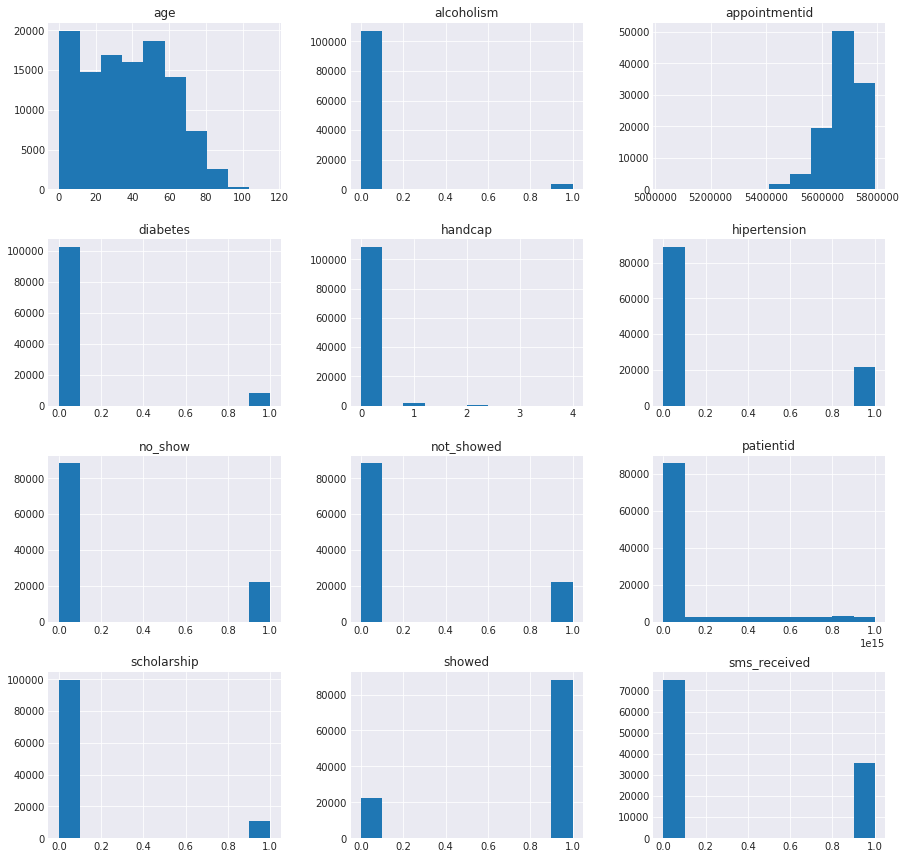

In [47]:
df.hist(figsize = (15,15));

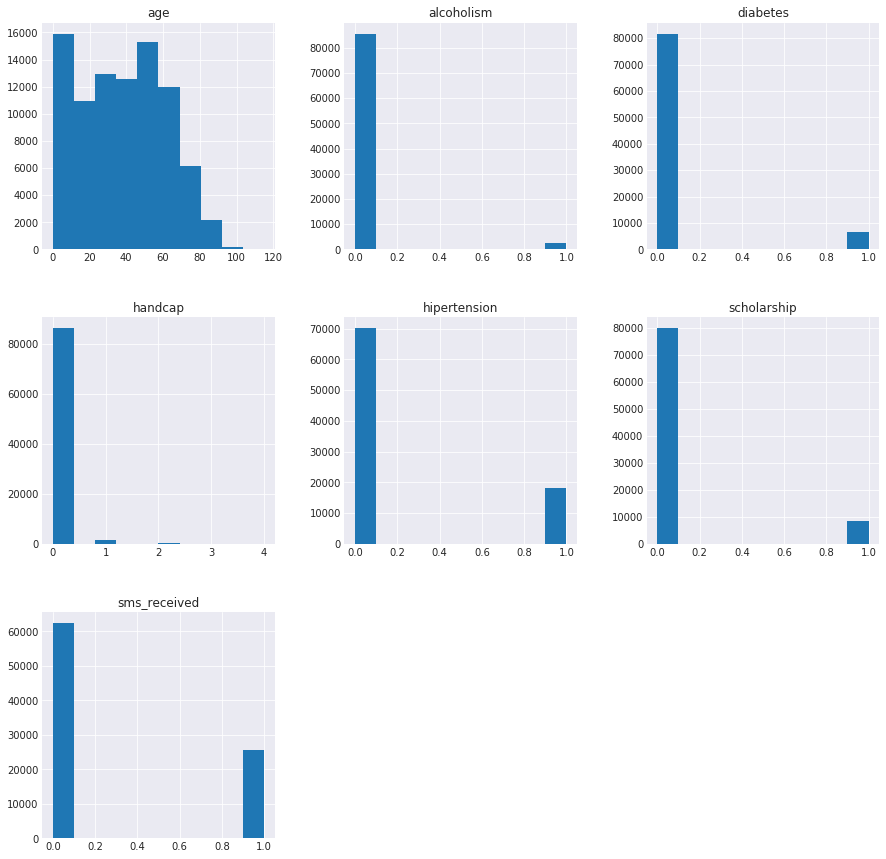

In [25]:
df_show.hist(figsize=(15,15));

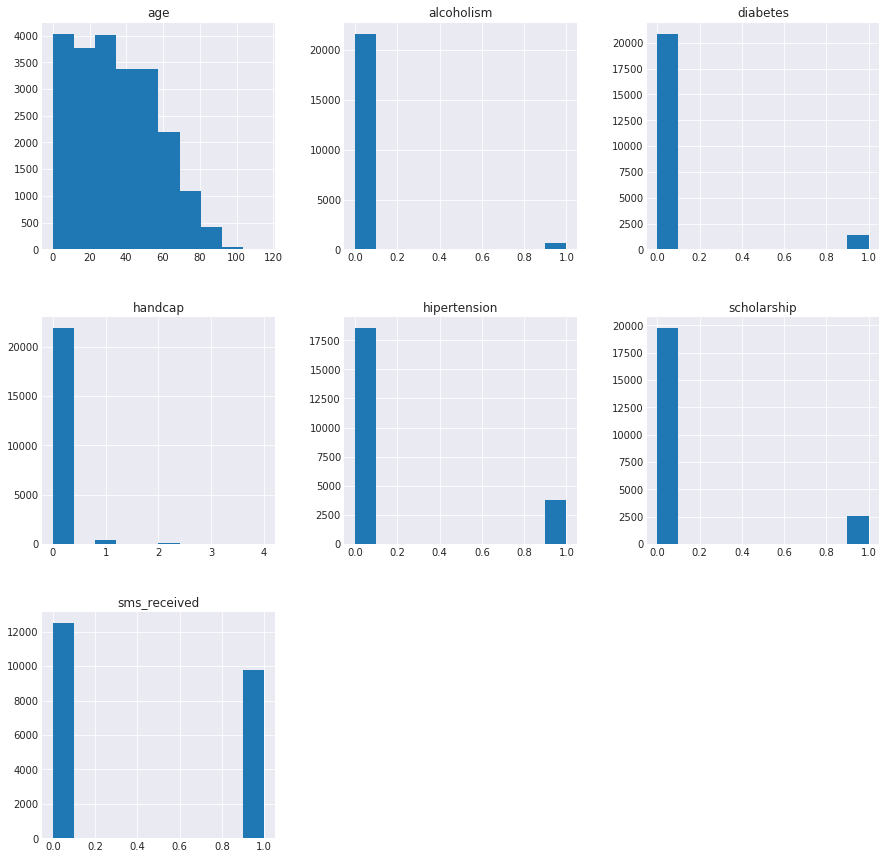

In [26]:
df_noshow.hist(figsize = (15,15));

79.8067440535


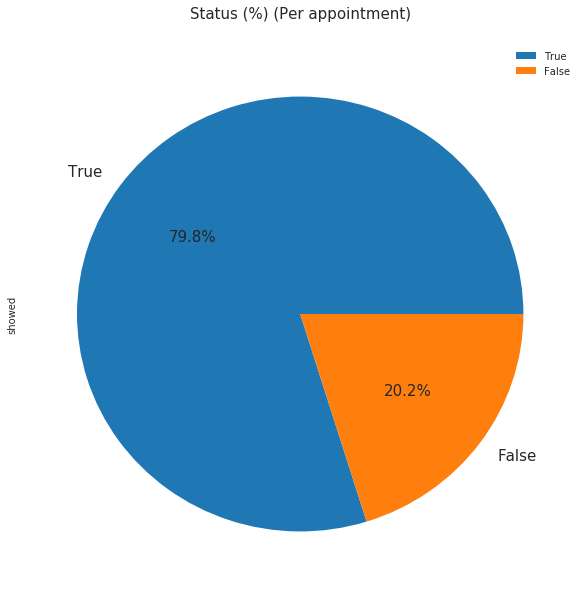

In [48]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
allP = df['showed'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 15);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

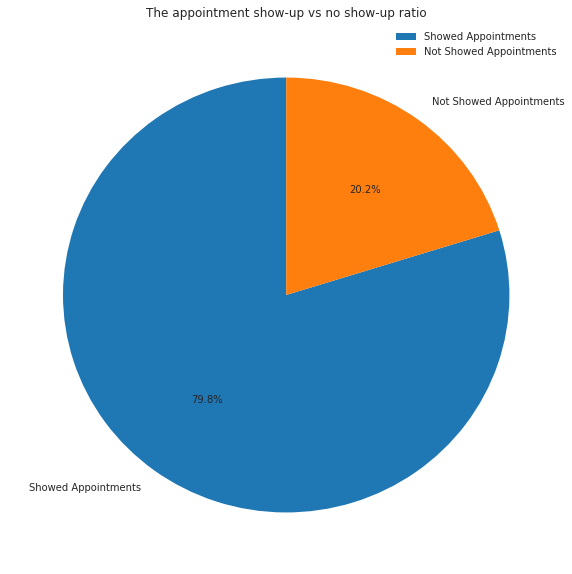

In [29]:
plt.figure(figsize =(10,10))
plt.pie([len(df_show),len(df_noshow)],labels =['Showed Appointments','Not Showed Appointments'],autopct='%1.1f%%',startangle=90)
plt.title('The appointment show-up vs no show-up ratio')
plt.legend();

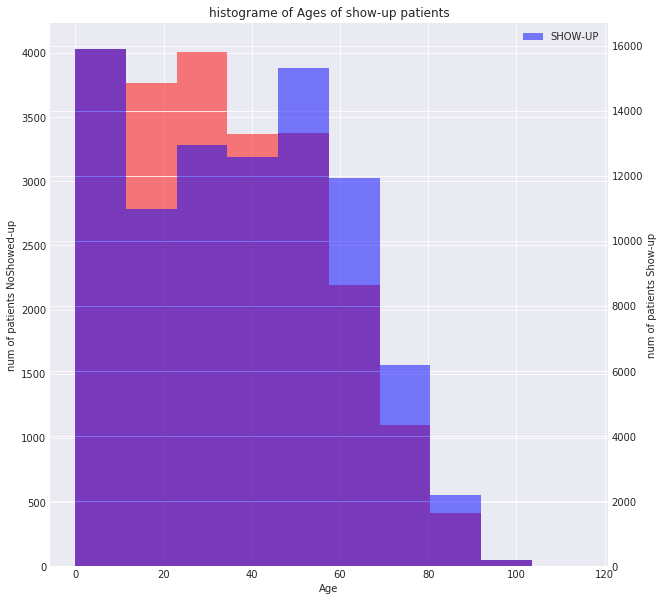

In [30]:
#plotting Histograms of patients ages (show-up, no show-up)

plt.figure(figsize =(10,10))
#hist of Ages of show-up patients 
plt.hist(df_noshow['age'],color ='r',alpha = 0.5)
plt.ylabel('num of patients NoShowed-up')
plt.xlabel('Age')

#hist of Ages of no show-up patients
plt.twinx()
plt.hist(df_show['age'],color ='b',alpha =0.5,label ='SHOW-UP')
plt.title('histograme of Ages of show-up patients')
plt.ylabel('num of patients Show-up')
plt.legend();

### making an histogram to see the realtion between the (age,alcoholic people, SMS recievers, Gender, Scholarship) and the people who came to thier appointment

In [32]:

scholarship_show = df_show['scholarship'].sum()
scholarship_noshow = df_noshow['scholarship'].sum()

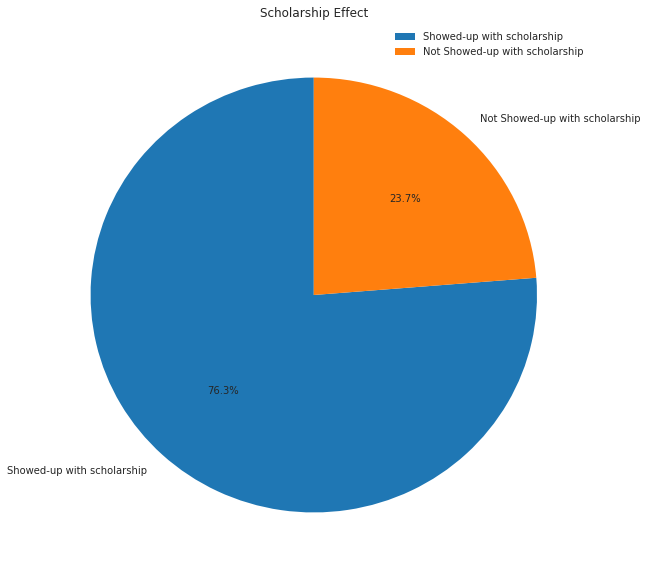

In [33]:
plt.figure(figsize =(10,10))
plt.pie([scholarship_show,scholarship_noshow],labels =['Showed-up with scholarship','Not Showed-up with scholarship'],autopct='%1.1f%%',startangle=90)
plt.title('Scholarship Effect')
plt.legend();

In [34]:
sms_show = df_show['sms_received'].sum() 
sms_noshow = df_noshow['sms_received'].sum()

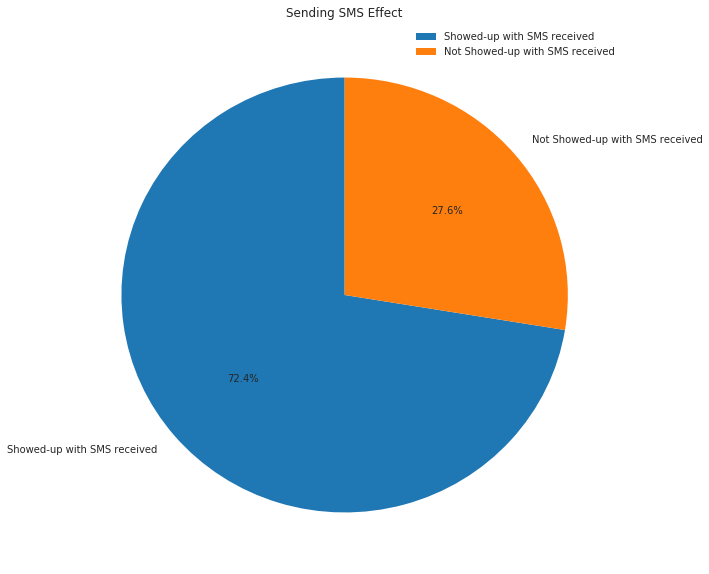

In [35]:
plt.figure(figsize =(10,10))
plt.pie([sms_show,sms_noshow],labels =['Showed-up with SMS received','Not Showed-up with SMS received'],autopct='%1.1f%%',startangle=90)
plt.title('Sending SMS Effect')
plt.legend();

In [36]:
df_show['appointmentday'].dt.day_name().value_counts()

Wednesday    20774
Tuesday      20488
Monday       18025
Friday       14982
Thursday     13909
Saturday        30
Name: appointmentday, dtype: int64

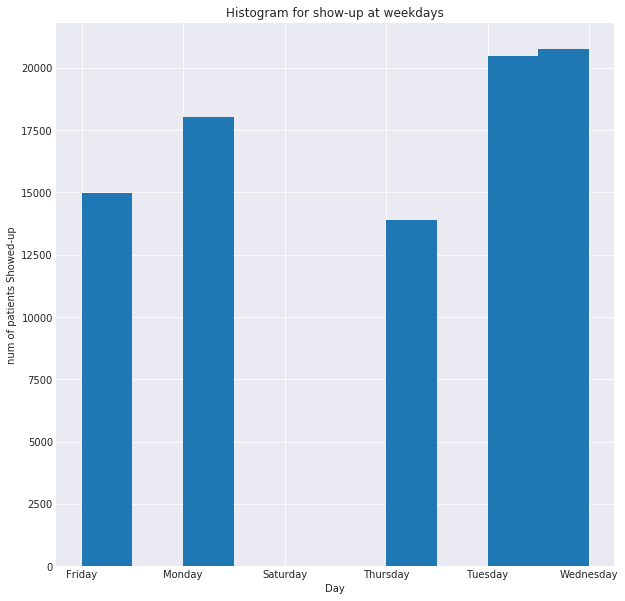

In [37]:
plt.figure(figsize =(10,10))
#hist of Ages of show-up patients 
plt.hist( df_show['appointmentday'].dt.day_name())
plt.ylabel('num of patients Showed-up')
plt.xlabel('Day')
plt.title('Histogram for show-up at weekdays');

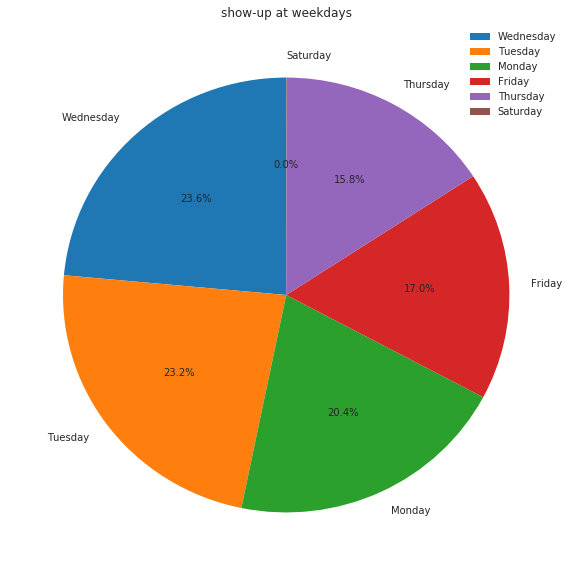

In [38]:
plt.figure(figsize =(10,10))
labels = df_show['appointmentday'].dt.day_name().value_counts().index
plt.pie(df_show['appointmentday'].dt.day_name().value_counts(), labels = labels ,autopct='%1.1f%%',startangle=90)
plt.title('show-up at weekdays')
plt.legend();

In [43]:
gender = df['gender'].value_counts()
gender_show = df_show['gender'].value_counts()
gender_noshow = df_noshow['gender'].value_counts()

#percentages of Males 
M_percentage_show =  gender_show.loc['M']/gender.loc['M']  
M_percentage_noshow = gender_noshow.loc['M']/gender.loc['M']  

#percentages of Females
F_percentage_show =  gender_show.loc['F']/gender.loc['F'] 
F_percentage_noshow = gender_noshow.loc['F']/gender.loc['F']

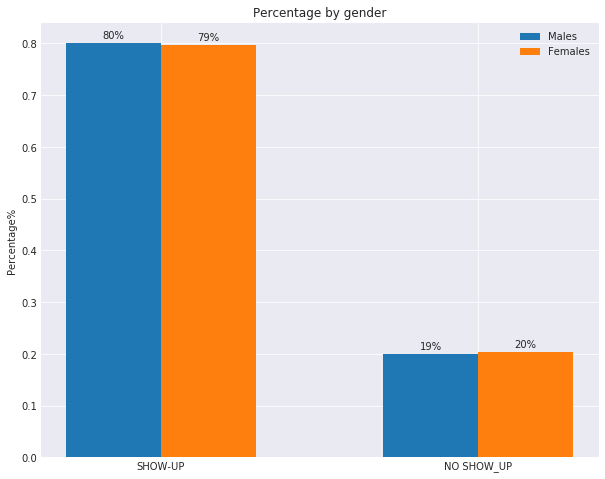

In [44]:
#Group bar plot for gender feature

labels = ['SHOW-UP','NO SHOW_UP']
M = [M_percentage_show,M_percentage_noshow]
F = [F_percentage_show,F_percentage_noshow]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10,8))
rects1 = ax.bar(x - width/2, M, width, label='Males')
rects2 = ax.bar(x + width/2, F, width, label='Females')

ax.set_ylabel('Percentage%')
ax.set_title('Percentage by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    #Attach a percentage above each bar in rects
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(int(height*100)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.show()

In [45]:
sms_show = df_show['sms_received'].sum() 
sms_noshow = df_noshow['sms_received'].sum()

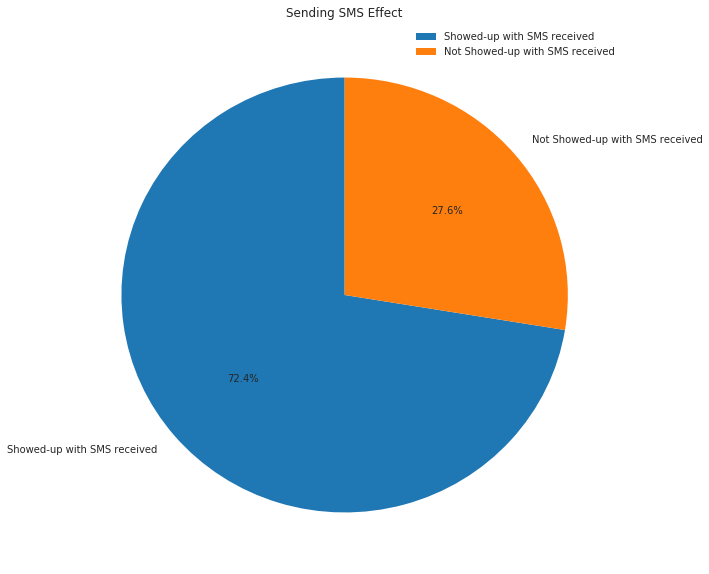

In [46]:
plt.figure(figsize =(10,10))
plt.pie([sms_show,sms_noshow],labels =['Showed-up with SMS received','Not Showed-up with SMS received'],autopct='%1.1f%%',startangle=90)
plt.title('Sending SMS Effect')
plt.legend();

<a id='conclusions'></a>
## the appointment show-up vs no show-up rate:
about 80% of total patiens show up in their appointments.

How the age of the patients affects the show-up?
We notice that generally the ages the patients who show up their appointment is greater than who didn't.
And we can also notice this in the means of ages, the mean age for patients who show up = 37.8, and for who did not = 34.3 years.

Scholarship effect
The % Percentage of the patients who have a scholarship and show up is 76.3%.

SMS effect
The % Percentage of the patients who received one or more SMS and show up is 72.4%.

Gender effect
The meals of femeals who show up is about 80% and this percentage is close to the overall rate.

weekday affect
We can notice that the day Wednsday has the most showing-up in the days of week.
The Day Saturday has very low showing-up.
The Day Sunday has zero records, So, may be they don't receive patiens that day.

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0